## Generating Network Pictures

This code takes the adjacency matrices with the towns and makes them into a pretty network!

In [3]:
# Importsss
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.image as mpimg
import pandas as pd

In [4]:
# Function to read in a text file into an array
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        arr = []
        for item in words:
            arr.append(item.split('\t'))
        fileObj.close()
        return arr

In [5]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]
# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

**Check Entropy is consistent**

In [6]:
dire = []
with os.scandir('/Volumes/HardDrive/New_Workflow/53_towns_network/') as entries:
    for entry in entries:
        if '._' not in entry.name:
            dire.append(entry.name)

In [7]:
def entropy(A):
    # A stochastic graph is the same as transition- gives probabilities        
    prob = nx.stochastic_graph(A)
    # Generates transition matrix
    probmat = nx.adjacency_matrix(prob)
    probmat = probmat.todense()
    matrix = np.array(probmat) # turns it into numpy array so that we can operate on it
    
    entnode =  np.apply_along_axis( row_ent, axis=1, arr = matrix ) # calculates entropy for each node

    entrop = sum(entnode)/ 297
    
    return entrop

    
# Defines a function to calculate the entropy of each node from the transition matrix.
def row_ent(row):
    enode = 0
    for item in row:
        if item > 0:
            enode -= item * math.log10(item) # Entropy formula for each node.
    return enode

In [8]:
def gen_ent_list(dire,kal):
    entlist = []
    
    # Do this for week by week
    for name in dire:
        # Read in the data and get it into a network
        my_data = genfromtxt('/Volumes/HardDrive/New_Workflow/'+kal + name, delimiter=',')
        A = nx.from_numpy_matrix(my_data)
        A = nx.DiGraph(A)
        towns = list(waloc['City / Town'])
        labeldict = {}
        for node in list(A.nodes()):
            labeldict[node] = towns[node]
        d = dict(A.degree)
        locs = {}
        
        for node in list(A.nodes()):
            locs[node] = np.array([float(waloc.iloc[node,2]),float(waloc.iloc[node,3])])
            
        weights = nx.get_edge_attributes(A, 'weight')
        logs = [math.log(item) for item in list(weights.values())]
        
        # Call the entropy function
        entlist.append(entropy(A))
    return entlist

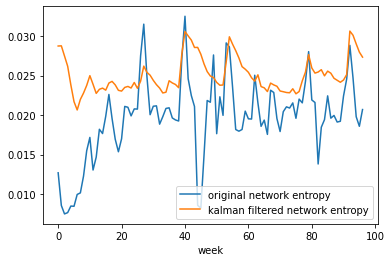

In [9]:
plt.plot(figsize = (10,6))
plt.xlabel('week')
plt.plot(gen_ent_list(dire,'53_towns_network/'), label = 'original network entropy')
plt.plot(gen_ent_list(dire,'kalman_all_53/'),label = 'kalman filtered network entropy')
plt.legend()

## Just one plot

In [10]:
# Read in the network, generate a plot for it
my_data = genfromtxt('/Volumes/HardDrive/New_Workflow/53_towns_network/'+dire[50], delimiter=',')
A = nx.from_numpy_matrix(my_data)
A = nx.DiGraph(A)

# Assign labels to each town based on waloc
towns = list(waloc['City / Town'])
labeldict = {}
for node in list(A.nodes()):
    labeldict[node] = towns[node]

d = dict(A.degree(weight='weight'))

# Get a dictionary of locations (helpful for plotting)
locs = {}
for node in list(A.nodes()):
    locs[node] = np.array([float(waloc.iloc[node,2]),float(waloc.iloc[node,3])])

In [11]:
locs[29] = np.array([113.7899,-21.9313])

In [12]:
labeldict

{0: 'Perth',
 1: 'Bunbury',
 2: 'Geraldton',
 3: 'Kalgoorlie-Boulder',
 4: 'Albany',
 5: 'Busselton',
 6: 'Karratha',
 7: 'Broome',
 8: 'Port Hedland',
 9: 'Esperance',
 10: 'Collie',
 11: 'Northam',
 12: 'Margaret River',
 13: 'Dunsborough',
 14: 'Newman',
 15: 'Carnarvon',
 16: 'Kununurra',
 17: 'Narrogin',
 18: 'Manjimup',
 19: 'Pinjarra',
 20: 'Katanning',
 21: 'Derby',
 22: 'Tom Price',
 23: 'Port Denison-Dongara',
 24: 'Harvey',
 25: 'Merredin',
 26: 'Denmark',
 27: 'York',
 28: 'Donnybrook',
 29: 'Exmouth',
 30: 'Waroona',
 31: 'Drummond Cove',
 32: 'Capel',
 33: 'Mount Barker',
 34: 'Kambalda West',
 35: 'Little Grove',
 36: 'Moora',
 37: 'Wickham',
 38: 'Cowaramup',
 39: 'Halls Creek',
 40: 'Bridgetown',
 41: 'Jurien Bay',
 42: 'Paraburdoo',
 43: 'Wagin',
 44: 'Kalbarri',
 45: 'Binningup',
 46: 'Kojonup',
 47: 'Boddington-Ranford',
 48: 'Fitzroy Crossing',
 49: 'Augusta',
 50: 'Dampier',
 51: 'Mandurah',
 52: 'Wyndham'}

In [13]:
# Get the edge widths based on the weight (use a log scale)
weights = nx.get_edge_attributes(A, 'weight')
logs = [math.log(item) for item in list(weights.values())]
minn = min(logs)
maxx = max(logs)
widths = [(item + 16) for item in logs]
for i in range(len(widths)):
    if widths[i] <-5:
        widths[i] = 0
    elif (widths[i] >= -5) & (widths[i] <=0.2):
        widths[i] = 0.2

In [19]:
# Better for raw google data
ws = []
for i in d.values():
    try:
        ws.append(15*math.log(10000000*i))
    except:
        ws.append(0)
        
for i in range(len(ws)):
    if ws[i]<10:
        ws[i] = 10

In [20]:
# Better for filtered, stochasticised data
# minn = 1
# for m in d.values():
#     if m <minn and m >0:
#         minn = m

# ws = []
# for i in d.values():
#     try:
#         ws.append(40*math.log(1/100*1/minn*i))
#     except:
#         ws.append(0)
        
# for i in range(len(ws)):
#     if ws[i]<10:
#         ws[i] = 10

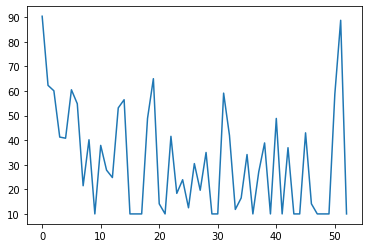

In [21]:
plt.plot(ws)

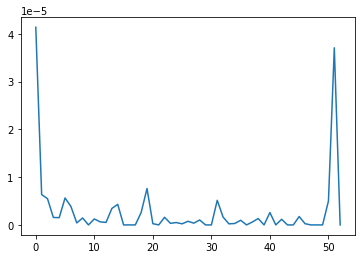

In [22]:
plt.plot(d.values())

In [35]:
def captionthis(string):
    name = 'Week of ' + string[16:18] + '/' + string[14:16] + '/' + string[12:14] + ' to ' +string[25:27]
    name += '/' + string[23:25] + '/' + string[21:23]
    return name

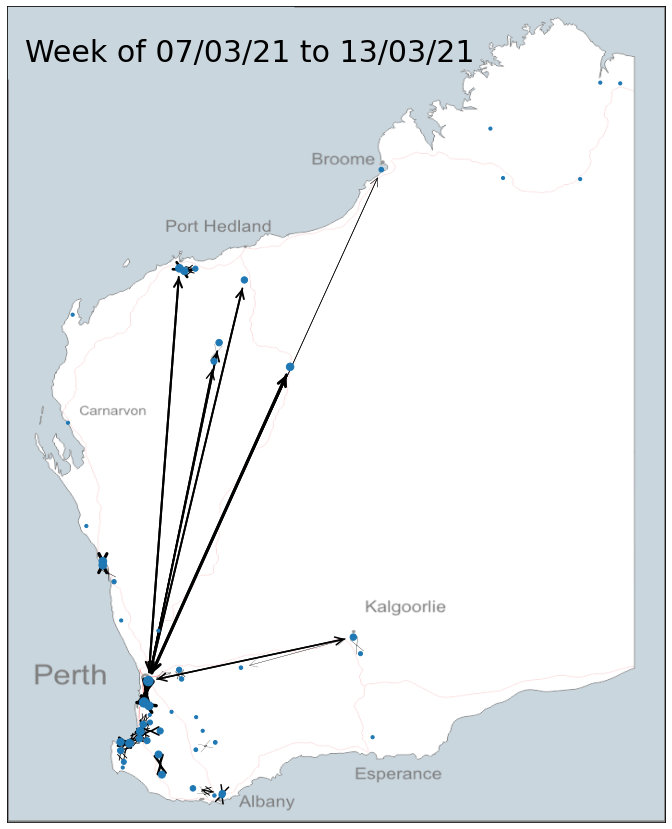

In [38]:
# Finally, plot the figure
plt.figure(figsize = (15,15))
#plt.title("Week of 15/03/20 to 22/03/20", fontsize = 30)
nx.draw_networkx_nodes(A, locs, node_size=ws, label = labeldict)
nx.draw_networkx_edges(A, locs, edgelist=weights.keys(), width=widths, arrows = True, arrowstyle = '->',arrowsize = 20)
#nx.draw_networkx_labels(A, locs, labels = labeldict, font_size = 8)
#plt.savefig('/Volumes/HardDrive/WA_mat_figs/name.png',bbox_inches='tight')
img = mpimg.imread('/Users/Yuval/Desktop/wa.gif')
plt.imshow(img,alpha = 0.5,extent = [112, 130, -35.8, -13.5])
plt.text(112.5,-15, captionthis(dire[50]), fontsize = 30)
plt.show()

## for loop for multiple plots

In [2]:
# for name in dire:
    
#     # Read in the network, generate a plot for it
#     my_data = genfromtxt('/Volumes/HardDrive/stochasticised/WA_297_20200322_20200328.txt', delimiter='\t')
#     A = nx.from_numpy_matrix(my_data)
#     A = nx.DiGraph(A)

#     # Assign labels to each town based on waloc
#     towns = [item[0] for item in waloc]
#     labeldict = {}
#     for node in list(A.nodes()):
#         labeldict[node] = towns[node]

#     d = dict(A.degree(weight='weight'))
#     my_data = genfromtxt('/Volumes/HardDrive/stochasticised/' + name, delimiter='\t')
#     A = nx.from_numpy_matrix(my_data)
#     towns = [item[0] for item in waloc]
#     labeldict = {}
#     for node in list(A.nodes()):
#         labeldict[node] = towns[node]
#     d = dict(A.degree(weight='weight'))
#     locs = {}
#     for node in list(A.nodes()):
#         locs[node] = np.array([float(waloc[node][2]),float(waloc[node][3])])
#     locs[30] = np.array([113.7899,-21.9313])    
    
#     # Get the edge widths based on the weight (use a log scale)
#     weights = nx.get_edge_attributes(A, 'weight')
#     logs = [math.log(item) for item in list(weights.values())]
#     minn = min(logs)
#     maxx = max(logs)
#     widths = [(item + 16) for item in logs]
#     for i in range(len(widths)):
#         if widths[i] <-5:
#             widths[i] = 0
#         elif (widths[i] >= -5) & (widths[i] <=0.2):
#             widths[i] = 0.2
            
            
#     ws = []
#     for i in d.values():
#         try:
#             ws.append(15*math.log(10000000*i))
#         except:
#             ws.append(0)

#     for i in range(len(ws)):
#         if ws[i]<10:
#             ws[i] = 10
            
#     plt.figure(figsize = (30,20))
#     #plt.title("Week of 15/03/20 to 22/03/20", fontsize = 30)
#     nx.draw_networkx_nodes(A, locs, node_size=ws)
#     nx.draw_networkx_edges(A, locs, edgelist=weights.keys(), width=widths, arrows = True, arrowstyle = '->',arrowsize = 20)
#     #nx.draw_networkx_labels(A, locs, labels = labeldict, font_size = 8)
#     #plt.savefig('/Volumes/HardDrive/WA_mat_figs/name.png',bbox_inches='tight')
#     img = mpimg.imread('/Users/Yuval/Desktop/Thesis/wa.gif')
#     plt.imshow(img,alpha = 0.5,extent = [112, 130, -35.8, -13.5])
#     plt.text(113,-15, "Week of " + name[13:15]+'/'+name[11:13]+'/'+name[9:11]+ ' to ' + name[22:24] + '/' + name[20:22] +'/'+ name[18:20], fontsize = 30)
#     plt.savefig('/Volumes/HardDrive/stochasticised_pics/image' +name[6:-4] +'.png',bbox_inches='tight')
#     plt.show()

In [ ]:
## Add some plots of some key sites (ie Perth to Geraldton, Perth to Kalgoorlie,)

In [1]:
# for name in dire:
#     my_data = genfromtxt('/Volumes/HardDrive/stochasticised/' + name, delimiter='\t')
#     A = nx.from_numpy_matrix(my_data)
#     towns = [item[0] for item in waloc]
#     labeldict = {}
#     for node in list(A.nodes()):
#         labeldict[node] = towns[node]
#     d = dict(A.degree)
#     locs = {}
#     for node in list(A.nodes()):
#         locs[node] = np.array([float(waloc[node][2]),float(waloc[node][3])])
#     weights = nx.get_edge_attributes(A, 'weight')
#     logs = [math.log(item) for item in list(weights.values())]
#     minn = min(logs)
#     maxx = max(logs)
#     widths = [(item + 16) for item in logs]
#     for i in range(len(widths)):
#         if widths[i] <0.2:
#             widths[i] = 0.2
            
#     plt.figure(figsize = (30,20))
#     #plt.title("Week of 15/03/20 to 22/03/20", fontsize = 30)
#     nx.draw_networkx_nodes(A, locs, node_size=[v * 20 +20 for v in d.values()])
#     nx.draw_networkx_edges(A, locs, edgelist=weights.keys(), width=widths, arrows = True, arrowstyle = '->',arrowsize = 20)
#     #nx.draw_networkx_labels(A, locs, labels = labeldict, font_size = 8)
#     #plt.savefig('/Volumes/HardDrive/WA_mat_figs/name.png',bbox_inches='tight')
#     img = mpimg.imread('/Users/Yuval/Desktop/Thesis/wa.gif')
#     plt.imshow(img,alpha = 0.5,extent = [112, 130, -35.8, -13.5])
#     plt.text(113,-15, "Week of " + name[13:15]+'/'+name[11:13]+'/'+name[9:11]+ ' to ' + name[22:24] + '/' + name[20:22] +'/'+ name[18:20], fontsize = 30)
#     #plt.savefig('/Volumes/HardDrive/stochasticised_pics/image' +name[6:-4] +'.png',bbox_inches='tight')
#     plt.show()

In [163]:
play = dire[-1]

In [169]:
play[13:15]+'/'+play[11:13]+'/'+play[9:11]+ ' to ' + play[22:24] + '/' + play[20:22] +'/'+ play[18:20]

'18/07/21 to 24/07/21'

In [173]:
'image'+play[6:-4]

'image_20210718_20210724'

In [180]:
maxx

-8.615005985030644